In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.tsv", sep="\t", index_col=0) # 学習用データ
test = pd.read_csv("test.tsv", sep="\t", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("sample_submit.tsv", sep="\t", index_col=0, header=None) # 応募用サンプルファイル

In [3]:
# trainとtestを結合
data = pd.concat([train, test],axis=0)
data['embarked'] = data['embarked'].fillna(data['embarked'].mode().item())

In [4]:
#embarkedとsexをEncode
from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()
sex_le.classes_ = ['male', 'female']
data['sex'] = sex_le.transform(data['sex'])

embarked_le = LabelEncoder()
embarked_le.classes_ = ['C', 'Q', 'S']
data['embarked'] = embarked_le.transform(data['embarked'])

In [5]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1.0,1,1,35.0,1,0,53.1000,2
4,0.0,3,0,35.0,0,0,8.0500,2
7,0.0,3,0,2.0,3,1,21.0750,2
9,1.0,2,1,14.0,1,0,30.0708,0
11,1.0,1,1,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
885,NaN,3,1,39.0,0,5,29.1250,1
886,NaN,2,0,27.0,0,0,13.0000,2
887,NaN,1,1,19.0,0,0,30.0000,2


In [6]:
#ageとfareを離散値にするため、対数変換をする
data['age_10'] = pd.qcut(data['age'], 10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data['fare_10'] = pd.qcut(data['fare'], 10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_10,fare_10
id,,,,,,,,,,
3,1.0,1,1,35.0,1,0,53.1000,2,6,8
4,0.0,3,0,35.0,0,0,8.0500,2,6,2
7,0.0,3,0,2.0,3,1,21.0750,2,0,5
9,1.0,2,1,14.0,1,0,30.0708,0,0,7
11,1.0,1,1,58.0,0,0,26.5500,2,9,6
...,...,...,...,...,...,...,...,...,...,...
885,NaN,3,1,39.0,0,5,29.1250,1,7,7
886,NaN,2,0,27.0,0,0,13.0000,2,4,4
887,NaN,1,1,19.0,0,0,30.0000,2,1,7


In [8]:
data_ = data.drop(['survived', 'age'], axis=1)

In [9]:
data_

,pclass,sex,sibsp,parch,fare,embarked,age_10,fare_10
id,,,,,,,,
3,1,1,1,0,53.1000,2,6,8
4,3,0,0,0,8.0500,2,6,2
7,3,0,3,1,21.0750,2,0,5
9,2,1,1,0,30.0708,0,0,7
11,1,1,0,0,26.5500,2,9,6
...,...,...,...,...,...,...,...,...
885,3,1,0,5,29.1250,1,7,7
886,2,0,0,0,13.0000,2,4,4
887,1,1,0,0,30.0000,2,1,7


In [10]:
# ageの欠損値を省く
age_10_train = data_.dropna(subset=['age_10'],axis=0).copy()

In [11]:
age_10_train

,pclass,sex,sibsp,parch,fare,embarked,age_10,fare_10
id,,,,,,,,
3,1,1,1,0,53.1000,2,6,8
4,3,0,0,0,8.0500,2,6,2
7,3,0,3,1,21.0750,2,0,5
9,2,1,1,0,30.0708,0,0,7
11,1,1,0,0,26.5500,2,9,6
...,...,...,...,...,...,...,...,...
885,3,1,0,5,29.1250,1,7,7
886,2,0,0,0,13.0000,2,4,4
887,1,1,0,0,30.0000,2,1,7


In [12]:
age_10_test = data_[data_['age_10'].isnull()].copy()

In [13]:
age_10_test

,pclass,sex,sibsp,parch,fare,embarked,age_10,fare_10
id,,,,,,,,
19,3,1,0,0,7.2250,0,NaN,0
26,3,0,0,0,7.2250,0,NaN,0
28,3,1,0,0,7.8792,1,NaN,2
29,3,0,0,0,7.8958,2,NaN,2
32,3,1,0,0,7.7500,1,NaN,1
...,...,...,...,...,...,...,...,...
832,3,0,0,0,7.2292,0,NaN,0
837,3,0,0,0,8.0500,2,NaN,2
839,1,0,0,0,29.7000,0,NaN,7


In [14]:
age_train_X = age_10_train.drop(['age_10'], axis=1)
age_train_y = age_10_train['age_10']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#https://kouya17.com/posts/27/
age_model = LogisticRegression(max_iter=100000)

In [16]:
cross_val_score(age_model, age_train_X, age_train_y, error_score ='raise')

array([0.27272727, 0.16083916, 0.20979021, 0.20979021, 0.19014085])

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
train_X, valid_X, train_y, valid_y = train_test_split(age_train_X, age_train_y, shuffle=True) 

In [19]:
train_X = torch.tensor(np.array(train_X),dtype=torch.float32)
train_y = torch.tensor(np.array(train_y),dtype=torch.float32)

valid_X = torch.tensor(np.array(valid_X),dtype=torch.float32)
valid_y = torch.tensor(np.array(valid_y),dtype=torch.float32)

In [20]:
train_scaler = MinMaxScaler(feature_range=(0,1))
train_X_scaled= train_scaler.fit_transform(train_X)

valid_X_scaled= train_scaler.transform(valid_X)

In [21]:
train_X

tensor([[ 2.0000,  1.0000,  0.0000,  ..., 15.7500,  2.0000,  5.0000],
        [ 2.0000,  0.0000,  0.0000,  ..., 10.5000,  2.0000,  3.0000],
        [ 2.0000,  0.0000,  0.0000,  ..., 13.0000,  2.0000,  4.0000],
        ...,
        [ 3.0000,  1.0000,  0.0000,  ..., 19.2583,  0.0000,  5.0000],
        [ 3.0000,  0.0000,  0.0000,  ...,  7.2250,  0.0000,  0.0000],
        [ 2.0000,  0.0000,  0.0000,  ..., 10.5000,  2.0000,  3.0000]])

In [22]:
#Datasetの作成
train_dataset = TensorDataset(train_X, train_y)
valid_dataset = TensorDataset(valid_X, valid_y)

# train_dataset = TensorDataset(torch.tensor(train_X_scaled, dtype=torch.float32), train_y)
# valid_dataset = TensorDataset(torch.tensor(valid_X_scaled, dtype=torch.float32), valid_y)

In [23]:
#動作確認
index = 0
print(train_dataset.__getitem__(index)[0].shape)
print(train_dataset.__getitem__(index)[1])

torch.Size([7])
tensor(7.)


In [24]:
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [25]:
#torchによるageモデル作成
import torch.nn.functional as F

class Net(nn.Module):    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 50)
        self.fc2 = nn.Linear(50, 250)
        self.fc3 = nn.Linear(250, 1000)
        self.fc4 = nn.Linear(1000, 5000)
        self.fc5 = nn.Linear(5000, 1000)
        self.fc6 = nn.Linear(1000, 250)
        self.fc7 = nn.Linear(250, 50)
        self.fc8 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        x = F.relu(x)
        x = self.fc7(x)
        x = F.relu(x)
        x = self.fc8(x)
        return x

net = Net()

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [27]:
from tqdm.notebook import tqdm

In [28]:
#学習
epochs = 25
train_loss_list = []
valid_loss_list = []
train_corrects_list = []
valid_corrects_list = []


for i in tqdm(range(epochs)):
    train_loss = 0
    train_corrects = 0
    net.train()
    for X,y in train_dataloader:
        optimizer.zero_grad()
        y_pred = net(X)
        single_loss = criterion(y_pred, y.long())
        single_loss.backward()
        optimizer.step()
        train_loss += single_loss.detach().item()
        _, y_pred_max = torch.max(y_pred, 1)
        train_corrects += torch.sum(y_pred_max == y.long())/len(y)
        
    train_loss /= len(train_dataloader)
    train_loss_list.append(train_loss)
    train_corrects /= len(train_dataloader)
    train_corrects_list.append(train_corrects)
    
    valid_loss = 0
    valid_corrects = 0
    net.eval()
    for X,y in valid_dataloader:
        with torch.no_grad():
            y_pred = net(X)
            single_loss = criterion(y_pred, y.long())
            valid_loss += single_loss.detach().item()
            _, y_pred_max = torch.max(y_pred, 1)
            valid_corrects += torch.sum(y_pred_max == y.long())/len(y)

    valid_loss /= len(valid_dataloader)
    valid_loss_list.append(valid_loss)
    valid_corrects /=len(valid_dataloader)
    valid_corrects_list.append(valid_corrects)

  0%|          | 0/25 [00:00<?, ?it/s]

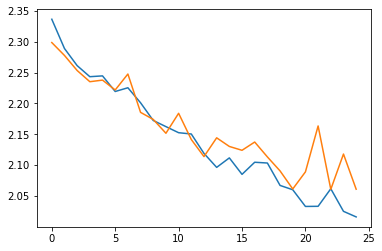

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.plot(valid_loss_list)

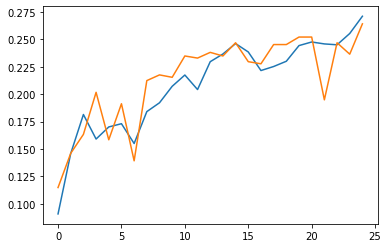

In [30]:
plt.plot(train_corrects_list)
plt.plot(valid_corrects_list)

In [31]:
net.eval()

Net(
  (fc1): Linear(in_features=7, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=5000, bias=True)
  (fc5): Linear(in_features=5000, out_features=1000, bias=True)
  (fc6): Linear(in_features=1000, out_features=250, bias=True)
  (fc7): Linear(in_features=250, out_features=50, bias=True)
  (fc8): Linear(in_features=50, out_features=10, bias=True)
)

In [32]:
age_test_X = age_10_test.drop(['age_10'], axis=1)

In [33]:
age_test_X_tensor = torch.tensor(np.array(age_test_X), dtype=torch.float32)

In [36]:
with torch.no_grad():
    y_pred = net(age_test_X_tensor)
    _, y_pred_max = torch.max(y_pred, 1)

In [37]:
pred_age_seies = pd.Series(y_pred_max, name='age_10')
pred_age_seies

0      2
1      2
2      2
3      2
4      2
      ..
172    2
173    2
174    9
175    2
176    2
Name: age_10, Length: 177, dtype: int64

In [38]:
age_test_X_ = age_test_X.reset_index(inplace=False, drop=False)

In [ ]:
age_10_test_ = pd.concat([age_test_X_, pred_age_seies], axis=1).set_index('id')

In [ ]:
age_10_test_

In [ ]:
age_10_train

In [ ]:
pd.concat([age_10_train, age_10_test_])